<a href="https://colab.research.google.com/github/Nurudeen2020/Python-for-Machine-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


In [8]:
heart_data.shape

(212, 14)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


In [45]:
X= heart_data.drop('target', axis=1)
y= heart_data['target']

In [46]:
import sklearn
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 0)

In [48]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [49]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [50]:
#Initializing the ANN
classifier= Sequential()

In [51]:
#Adding the input and the first hidden layer
classifier.add(Dense(units=10, kernel_initializer= 'he_uniform', activation= 'relu', input_dim =13))

In [52]:
#Adding the second hidden layer
classifier.add(Dense(units=15, kernel_initializer= 'he_uniform', activation= 'relu'))

In [53]:
#Adding the third hidden layer
classifier.add(Dense(units=20, kernel_initializer= 'he_normal', activation= 'relu'))

In [54]:
#Adding the output layer
classifier.add(Dense(units=1, kernel_initializer= 'glorot_uniform', activation= 'sigmoid'))

In [55]:
#Compiling the CNN
classifier.compile(optimizer='adamax', loss= 'binary_crossentropy', metrics= ['accuracy'])

In [56]:
#Fitting the ANN to thee training set
model_history= classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs= 100)

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 1.5255 - accuracy: 0.5020 - val_loss: 1.0781 - val_accuracy: 0.4464
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1919 - accuracy: 0.5247 - val_loss: 0.9872 - val_accuracy: 0.4286
Epoch 3/100
12/12 [==============================] - 0s 15ms/step - loss: 1.0083 - accuracy: 0.5468 - val_loss: 0.9141 - val_accuracy: 0.4464
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1172 - accuracy: 0.4405 - val_loss: 0.8423 - val_accuracy: 0.4643
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0284 - accuracy: 0.4962 - val_loss: 0.7938 - val_accuracy: 0.4643
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8895 - accuracy: 0.5096 - val_loss: 0.7564 - val_accuracy: 0.5179
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.8579 - accuracy: 0.4936 - val_loss: 0.7323 - val_accuracy: 0.5536
Epoch 8/100

In [57]:
#Making the predictions and evaluating the model
#Predicting the Test set results 
y_pred= classifier.predict(X_test)
y_pred= (y_pred > 0.5)
print(y_pred)

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [False]
 [False]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [ True]
 [ True]
 [ True]
 [ True]
 [False]
 [ True]
 [False]
 [ True]]


In [58]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[14  4]
 [ 7 18]]


In [59]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_pred, y_test)
print(score)

0.7441860465116279


In [60]:
#List all data in history
print(model_history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


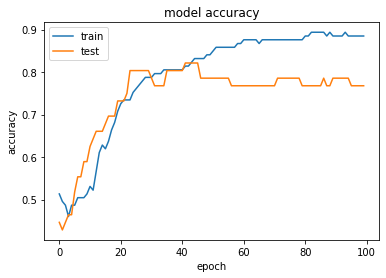

In [63]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()